# Construindo chatbot de atendimento médico com técnicas tradicionais de machine learning

## Imports

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
from collections import Counter
from faker import Faker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


## Dataset

### Construindo o dataset para o chatboot médico

In [37]:
import random
import pandas as pd

# Dados base com perguntas, categorias e respostas
data = [
    ("Quais são os sintomas da gripe?", "gripe", "Os sintomas da gripe incluem febre, dor no corpo, calafrios, dor de garganta e tosse."),
    ("Estou com febre e dor no corpo, é gripe?", "gripe", "Esses sintomas são comuns na gripe. Se você estiver com tosse e dor no corpo também, pode ser a gripe."),
    ("Como saber se estou gripado?", "gripe", "A gripe geralmente apresenta febre, calafrios, dor de cabeça e dor muscular. Se você tiver esses sintomas, é possível que seja gripe."),
    ("Estou com febre alta e dor no corpo, o que pode ser?", "gripe", "Esses sintomas podem ser causados por várias condições, como a gripe ou até a Covid-19. Você já teve contato com alguém que testou positivo para Covid-19 recentemente?"),
    ("Não, mas estou com tosse também.", "gripe", "A tosse junto com febre é uma característica comum da gripe. Recomendo que você procure um médico para uma avaliação mais detalhada."),
    
    ("Quais os sintomas de um infarto?", "cardiologia", "Os sintomas incluem dor no peito, falta de ar, dor nas costas e suor excessivo."),
    ("Estou com dor no peito e falta de ar, isso pode ser um infarto?", "cardiologia", "Sim, esses podem ser sintomas de infarto. Procure ajuda médica imediatamente."),
    ("Quais exames devo fazer para checar a saúde do coração?", "cardiologia", "Os exames mais comuns incluem o eletrocardiograma (ECG), ecocardiograma e testes de esforço."),
    ("Como posso saber se meu colesterol está alto?", "cardiologia", "Você pode verificar seu colesterol através de um exame de sangue chamado lipidograma, que mede os níveis de colesterol e triglicerídeos."),

    ("Como posso tratar acne?", "dermatologia", "A acne pode ser tratada com medicamentos tópicos, como peróxido de benzoíla ou cremes com retinoides."),
    ("Tenho espinhas no rosto, o que devo fazer?", "dermatologia", "Você pode usar cremes específicos para acne e evitar apertar as espinhas. Se necessário, consulte um dermatologista."),

    ("O que é depressão?", "saude_mental", "A depressão é um transtorno mental caracterizado por sentimentos persistentes de tristeza, perda de interesse nas atividades diárias e cansaço extremo."),
    ("Quais são os sintomas da depressão?", "saude_mental", "Os sintomas incluem tristeza constante, dificuldade de concentração, insônia ou sono excessivo, e perda de apetite."),

    ("Qual a melhor dieta para perder peso?", "nutricao", "Uma dieta balanceada, com controle de calorias e aumento do consumo de vegetais, é eficaz para perda de peso."),
    ("Devo cortar carboidratos para emagrecer?", "nutricao", "Não é necessário cortar carboidratos totalmente. O importante é escolher carboidratos saudáveis e consumi-los com moderação."),

    ("Vocês aceitam plano de saúde X?", "convenios", "Sim, aceitamos o plano de saúde X. Você pode consultar as coberturas diretamente com nossa recepção."),
    ("Quais planos de saúde vocês aceitam?", "convenios", "Aceitamos planos como Amil, Bradesco Saúde e Unimed. Consulte as condições com a recepção."),

    ("Como posso agendar uma consulta?", "consultas", "Você pode agendar sua consulta através do nosso portal online ou entrando em contato com a recepção."),
    ("Preciso levar algum exame para a consulta?", "consultas", "Recomendamos que leve os exames mais recentes, caso tenha algum, para facilitar a avaliação do médico."),

    ("Qual o melhor tratamento para dor nas costas?", "ortopedia", "O tratamento pode incluir fisioterapia, medicamentos anti-inflamatórios e, em alguns casos, cirurgia."),
    ("Estou com dor nas costas, o que pode ser?", "ortopedia", "A dor nas costas pode ser causada por tensão muscular, problemas na coluna ou até uma hérnia. É importante procurar um médico para diagnóstico."),
    ("Como saber se a dor nas costas é grave?", "ortopedia", "A dor nas costas pode ser grave se for acompanhada de dormência, fraqueza nas pernas ou dificuldade de movimentação. Caso esses sintomas apareçam, procure um médico imediatamente."),

    ("Estou com muita dor de cabeça, o que posso fazer?", "neurologia", "Se a dor de cabeça for muito forte e persistir, pode ser sinal de enxaqueca ou outro problema. Tente descansar em um local tranquilo e tomar um analgésico, mas se persistir, consulte um médico.")
]

# Agrupar por categoria
from collections import defaultdict
category_dict = defaultdict(list)
for q, c, a in data:
    category_dict[c].append((q, a))

# Gerar dados sintéticos balanceados
synthetic_data = []
target_per_class = 500

for category, qa_list in category_dict.items():
    for _ in range(target_per_class):
        q, a = random.choice(qa_list)
        # Introduzir leve embaralhamento nas perguntas
        q_words = q.split()
        random.shuffle(q_words)
        shuffled_q = ' '.join(q_words)
        synthetic_data.append((shuffled_q, category, a))

# Embaralhar os dados
random.shuffle(synthetic_data)

# Converter para DataFrame
df = pd.DataFrame(synthetic_data, columns=["pergunta", "categoria", "resposta"])
df.to_csv('../data/processed/nlp_chatbot_dataset.csv')

### Lendo o dataset criado

In [38]:
df = pd.read_csv('../data/processed/nlp_chatbot_dataset.csv').drop('Unnamed: 0', axis=1)
df.head()

,pergunta,categoria,resposta
0,"o no rosto, Tenho fazer? devo espinhas que",dermatologia,Você pode usar cremes específicos para acne e ...
1,"fazer? de posso cabeça, dor que muita Estou o com",neurologia,Se a dor de cabeça for muito forte e persistir...
2,"muita fazer? Estou o que dor cabeça, de posso com",neurologia,Se a dor de cabeça for muito forte e persistir...
3,"com o dor muita que Estou fazer? de posso cabeça,",neurologia,Se a dor de cabeça for muito forte e persistir...
4,uma posso Como agendar consulta?,consultas,Você pode agendar sua consulta através do noss...


## Explorando o dataset

### Colunas

In [39]:
df.columns

Index(['pergunta', 'categoria', 'resposta'], dtype='object')

### Dimensões

In [40]:
df.shape

(4500, 3)

### Verificando existência de valores nulos

In [41]:
df.isna().sum()

pergunta     0
categoria    0
resposta     0
dtype: int64

### Quantidade de caracteres para cada variável (pergunta, categoria e reposta)

In [44]:
df['caracteres_pergunta'] = df.pergunta.apply(lambda x: len(x))
df['caracteres_categoria'] = df.categoria.apply(lambda x: len(x))
df['caracteres_resposta'] = df.resposta.apply(lambda x: len(x))

df.head()

,pergunta,categoria,resposta,caracteres_pergunta,caracteres_categoria,caracteres_resposta
0,"o no rosto, Tenho fazer? devo espinhas que",dermatologia,Você pode usar cremes específicos para acne e ...,42,12,116
1,"fazer? de posso cabeça, dor que muita Estou o com",neurologia,Se a dor de cabeça for muito forte e persistir...,49,10,193
2,"muita fazer? Estou o que dor cabeça, de posso com",neurologia,Se a dor de cabeça for muito forte e persistir...,49,10,193
3,"com o dor muita que Estou fazer? de posso cabeça,",neurologia,Se a dor de cabeça for muito forte e persistir...,49,10,193
4,uma posso Como agendar consulta?,consultas,Você pode agendar sua consulta através do noss...,32,9,100


### Distribuição das categorias

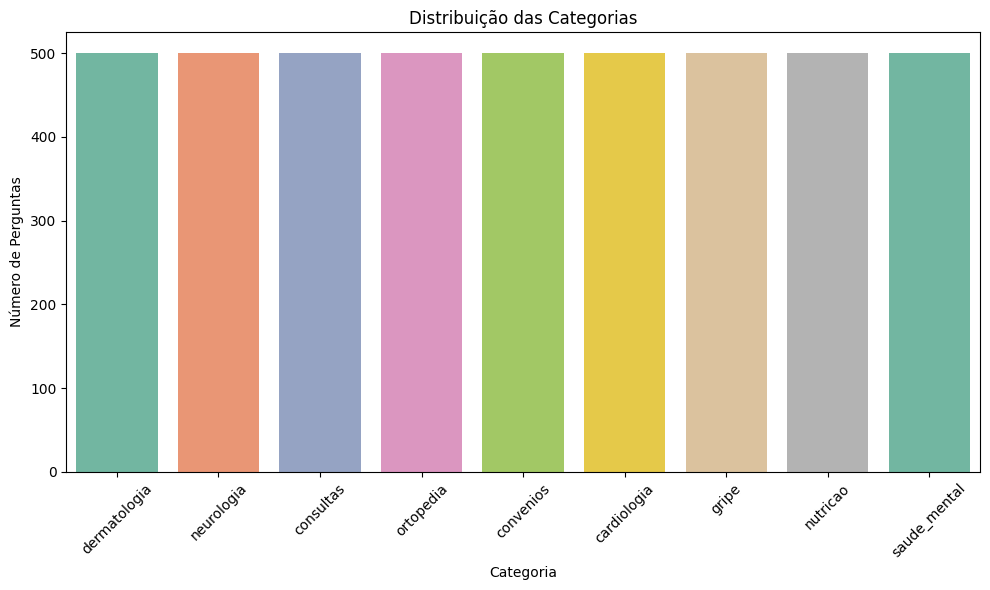

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='categoria',
    hue='categoria',
    order=df['categoria'].value_counts().index,
    palette='Set2',
    legend=False
)
plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Número de Perguntas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
df.categoria.value_counts()

categoria
dermatologia    500
neurologia      500
consultas       500
ortopedia       500
convenios       500
cardiologia     500
gripe           500
nutricao        500
saude_mental    500
Name: count, dtype: int64

## Pré-processamento dos dados

### Função de pré-processamento de texto

In [50]:
# Função de pré-processamento do texto
def preprocess_text(text):
    # Transformando para minúsculas
    text = text.lower()
    
    # Remover símbolos e pontuação usando expressão regular
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

### Relizando limpeza de elementos não significativos nas perguntas

In [52]:
# Aplicando o pré-processamento nas perguntas
df['pergunta'] = df['pergunta'].apply(preprocess_text)
df.head()

,pergunta,categoria,resposta,caracteres_pergunta,caracteres_categoria,caracteres_resposta
0,o no rosto tenho fazer devo espinhas que,dermatologia,Você pode usar cremes específicos para acne e ...,42,12,116
1,fazer de posso cabeça dor que muita estou o com,neurologia,Se a dor de cabeça for muito forte e persistir...,49,10,193
2,muita fazer estou o que dor cabeça de posso com,neurologia,Se a dor de cabeça for muito forte e persistir...,49,10,193
3,com o dor muita que estou fazer de posso cabeça,neurologia,Se a dor de cabeça for muito forte e persistir...,49,10,193
4,uma posso como agendar consulta,consultas,Você pode agendar sua consulta através do noss...,32,9,100


### Vetorizando os dados usando TF-IDF

In [54]:
# Vetorizador TF-IDF
vectorizer = TfidfVectorizer()

# Transformando as perguntas em vetores TF-IDF
X = vectorizer.fit_transform(df['pergunta'])

# As categorias serão os rótulos (y)
y = df['categoria']

### Imprimindo a matriz esparsa da vetorização

In [55]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df.head()

,aceitam,acne,agendar,algum,alta,alto,ar,cabeça,carboidratos,checar,...,sintomas,são,também,tenho,tosse,tratamento,tratar,um,uma,vocês
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.445403,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.411966,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.411966,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.411966,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.532808,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.532808,0.0


### Convertendo as labels literais em labels numéricas

In [56]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Se quiser ver o resultado:
print("Categorias codificadas:", y_encoded)
print("Classes:", encoder.classes_)

Categorias codificadas: [3 5 5 ... 8 3 6]
Classes: ['cardiologia' 'consultas' 'convenios' 'dermatologia' 'gripe' 'neurologia'
 'nutricao' 'ortopedia' 'saude_mental']


## Treinamento dos modelos

### Separando conjunto de dados em treino e teste

In [57]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

### Regressão Logística

In [58]:
# Instanciar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

 cardiologia       1.00      1.00      1.00       156
   consultas       1.00      1.00      1.00       159
   convenios       1.00      1.00      1.00       159
dermatologia       1.00      1.00      1.00       153
       gripe       1.00      1.00      1.00       142
  neurologia       1.00      1.00      1.00       128
    nutricao       1.00      1.00      1.00       144
   ortopedia       1.00      1.00      1.00       157
saude_mental       1.00      1.00      1.00       152

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350



### Random Forest

In [60]:
# Treinamento do modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names= encoder.classes_))

Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

 cardiologia       1.00      1.00      1.00       156
   consultas       1.00      1.00      1.00       159
   convenios       1.00      1.00      1.00       159
dermatologia       1.00      1.00      1.00       153
       gripe       1.00      1.00      1.00       142
  neurologia       1.00      1.00      1.00       128
    nutricao       1.00      1.00      1.00       144
   ortopedia       1.00      1.00      1.00       157
saude_mental       1.00      1.00      1.00       152

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350



### K-Nearest Neighbors

In [75]:
# Criar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn.predict(X_test)

# Calcular a acurácia
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia do KNN: {acuracia_knn}')

# Relatório de classificação
print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred_knn))

Acurácia do KNN: 1.0
Relatório de Classificação (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00       128
           6       1.00      1.00      1.00       144
           7       1.00      1.00      1.00       157
           8       1.00      1.00      1.00       152

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350



### Support Vector Machines

In [78]:
# Inicializando o modelo SVM
svm_model = SVC(kernel='linear')  # Usando um kernel linear

# Treinando o modelo com os dados
svm_model.fit(X_train, y_train)

# Realizando previsões
y_pred_svm = svm_model.predict(X_test)

# Calcular a acurácia
acuracia_svm = accuracy_score(y_test, y_pred_svm)
print(f'Acurácia do SVM: {acuracia_svm}')

# Relatório de classificação
print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred_svm))

Acurácia do SVM: 1.0
Relatório de Classificação (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00       128
           6       1.00      1.00      1.00       144
           7       1.00      1.00      1.00       157
           8       1.00      1.00      1.00       152

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350

